<a href="https://colab.research.google.com/github/Alanapengilley/Dampier/blob/main/dampier_katie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyrolite

     |████████████████████████████████| 580 kB 6.7 MB/s 
     |████████████████████████████████| 51 kB 214 kB/s 
     |████████████████████████████████| 11.2 MB 17.9 MB/s 
     |████████████████████████████████| 686 kB 41.5 MB/s 
     |████████████████████████████████| 900 kB 34.1 MB/s 
  Created wheel for periodictable: filename=periodictable-1.6.0-py3-none-any.whl size=749750 sha256=6fe6f71328560568bf9f977bde530ffc5c11e002d1e7719127eefc74e91e7b66
  Stored in directory: /root/.cache/pip/wheels/31/d2/e0/764db3104c74c9d991315dc39d1647012d38d9e76851bb16ae
Successfully built periodictable
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you hav

In [ ]:
import pandas as pd
import pyrolite.geochem
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import sklearn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/numpydoc/docscrape.py:440: UserWarning: potentially wrong underline length... 
Note 
----- in 
Plots spidergrams for trace elements data. Additional arguments are typically forwarded
to respective :mod:`matplotlib` functions :func:`~matplotlib.pyplot.plot` and... in the docstring of spider in /usr/local/lib/python3.7/dist-packages/pyrolite/plot/spider.py.
  warn(msg)
/usr/local/lib/python3.7/dist-packages/numpydoc/docscrape.py:440: UserWarning: potentially wrong underline length... 
Parameters 
----------- in 
Method for plotting histograms (mode='hist2d'|'hexbin') or kernel density
esitimates from point data. Convenience access function to... in the docstring of density in /usr/local/lib/python3.7/dist-packages/pyrolite/plot/__in

In [ ]:
#data = pd.read_csv('Source_data.csv')

FileNotFoundError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Source_data.csv to Source_data (4).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Source_data.csv']))

In [ ]:
print(data)
print(data.shape)

            Name         Location     Geochem      Social    MgO  Al2O3  \
0    E1:68490025  Mt. Witori Area           E     Hoskins   2.81  17.58   
1    E1:68490031  Mt. Witori Area           E     Hoskins   1.47  15.00   
2    E1:68490033  Mt. Witori Area           E     Hoskins   1.36  15.13   
3    E1:68490030  Mt. Witori Area           E     Hoskins   1.10  14.74   
4    E1:75710021  Mt. Witori Area           E     Hoskins   1.57  14.63   
..           ...              ...         ...         ...    ...    ...   
310  s_13 [5432]     MOUNT MURRAY  New Guinea  New Guinea   2.25  17.10   
311  s_18 [5432]     MOUNT BOSAVI  New Guinea  New Guinea  11.70  14.10   
312  s_19 [5432]     MOUNT BOSAVI  New Guinea  New Guinea   6.75  16.20   
313  s_20 [5432]     MOUNT BOSAVI  New Guinea  New Guinea   2.10  17.30   
314  Dampier_Axe              NaN  New Guinea         NaN    NaN  15.30   

      SiO2  P2O5   K2O    CaO  ...   MnO  FeO2O3     Ni    Cu    Zn    Rb  \
0    57.33  0.16  0.51

In [ ]:
data.pyrochem.elements 

,V,Ni,Cu,Zn,Rb,Sr,Y,Zr,Nb
0,240.0,10.0,75.0,86.0,6.1,420.0,19.0,34.0,0.0
1,97.0,0.2,17.0,76.0,12.0,330.0,20.0,50.0,0.0
2,94.0,0.2,15.0,86.0,13.0,370.0,21.0,58.0,0.0
3,43.0,0.2,9.0,67.0,14.0,310.0,16.0,58.0,0.0
4,80.0,0.1,9.0,84.0,13.0,355.0,15.0,59.0,0.1
...,...,...,...,...,...,...,...,...,...
310,130.0,8.0,22.0,0.0,81.0,785.0,23.5,285.0,12.0
311,280.0,222.0,68.0,0.0,29.0,675.0,20.5,146.0,8.9
312,195.0,97.0,52.0,0.0,39.5,690.0,22.0,187.0,13.5
313,120.0,10.0,42.0,0.0,71.0,765.0,21.5,256.0,14.0


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Define predictor (elements) and response (category) variables 
x = data[['Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'V', 'MnO', 'FeO2O3', 'Ni', 'Cu', 'Zn', 'Rb', 'Sr', 'Y', 'Zr', 'Nb']]
y = data['Geochem']

print(data.Name)
print(data.Geochem)

0      E1:68490025
1      E1:68490031
2      E1:68490033
3      E1:68490030
4      E1:75710021
          ...     
310    s_13 [5432]
311    s_18 [5432]
312    s_19 [5432]
313    s_20 [5432]
314    Dampier_Axe
Name: Name, Length: 315, dtype: object
0               E
1               E
2               E
3               E
4               E
          ...    
310    New Guinea
311    New Guinea
312    New Guinea
313    New Guinea
314    New Guinea
Name: Geochem, Length: 315, dtype: object


In [ ]:
#Fit the LDA model
model = LinearDiscriminantAnalysis()
fit = model.fit(x, y)
#fit = model.fit(x, y).transform(x)

In [ ]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.8466397849462365


In [ ]:
print(fit)

[[-2.31498132  0.16522682 -0.4907667  ...  0.25062858  0.11208741
   1.09726301]
 [-2.36677332 -0.29754819  0.16053643 ...  0.78955657  0.71411978
   1.63979475]
 [-2.53457867 -0.61887371 -0.01413252 ...  0.57347891  0.12615848
   2.15220064]
 ...
 [ 5.01650746  6.87220219 -5.66686526 ... -0.89675701  0.94369133
  -1.59441696]
 [ 6.69778657  5.17529725 -4.46327439 ... -0.07435323 -2.36935542
  -0.98075907]
 [-0.6960972   1.58253632  0.68991637 ... -0.97128605 -0.06475004
  -1.94371879]]


In [ ]:
y_pred= model.fit(x, y).predict(x)
y_pred_prob = fit.predict_proba(x)

print(fit.get_params())

AttributeError: ignored

In [ ]:
highest_prob = []

for sample in range(y_pred_prob.shape[0]):    #iterates through each sample
    highest_prob.append(np.max(y_pred_prob[sample]))   #gets max probability of that sample (highest likelyhood)
    
    
print(len(highest_prob))

315


In [ ]:
df = pd.DataFrame({'sample':data.Name.values, 'predicted_cat':y_pred, 'prob_predicted':highest_prob, 'actual_cat':data.Geochem})
df['recovered'] = (df['predicted_cat']==df['actual_cat'])

print("percent classified correctly=",np.sum((df['recovered'].values)*1)/len(df['sample']))

print(df)

percent classified correctly= 0.8920634920634921
          sample predicted_cat  prob_predicted  actual_cat  recovered
0    E1:68490025             F        0.842992           E      False
1    E1:68490031             F        0.829967           E      False
2    E1:68490033             F        0.915813           E      False
3    E1:68490030             F        0.777388           E      False
4    E1:75710021             F        0.737702           E      False
..           ...           ...             ...         ...        ...
310  s_13 [5432]    New Guinea        1.000000  New Guinea       True
311  s_18 [5432]    New Guinea        1.000000  New Guinea       True
312  s_19 [5432]    New Guinea        1.000000  New Guinea       True
313  s_20 [5432]    New Guinea        1.000000  New Guinea       True
314  Dampier_Axe             E        0.504361  New Guinea      False

[315 rows x 5 columns]


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df)

               sample predicted_cat  prob_predicted  actual_cat  recovered
0         E1:68490025             F        0.842992           E      False
1         E1:68490031             F        0.829967           E      False
2         E1:68490033             F        0.915813           E      False
3         E1:68490030             F        0.777388           E      False
4         E1:75710021             F        0.737702           E      False
5          E1:WP01001            GN        0.877945           E      False
6           E1:W00013            GN        0.931230           E      False
7          E1:WP01003            GN        0.937665           E      False
8          E1:WP01002            GN        0.962486           E      False
9         E2:51NG3028             E        0.980456           E       True
10        E2:51NG3035             E        0.884335           E       True
11       E2:51NG3039B             E        0.880449           E       True
12        E3:51NG0113    

In [ ]:
print(pd.unique(df.predicted_cat))

['F' 'GN' 'E' 'GS' 'H' 'Rabaul' 'Vitiaz' 'New Guinea']


#ADCEC7


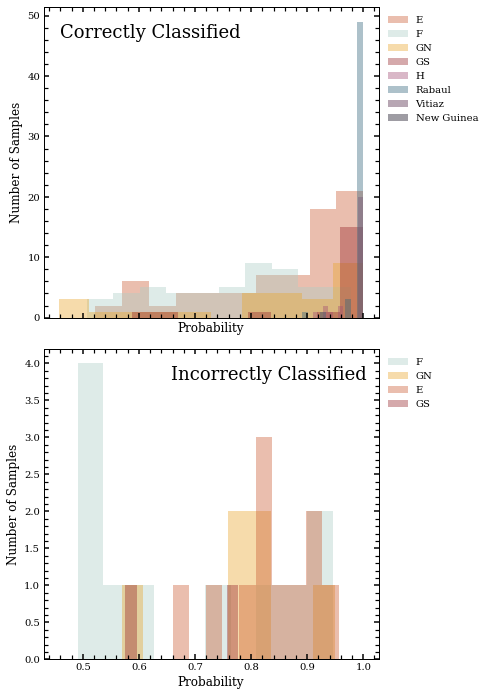

In [ ]:

#assigns each unique classifier a color
color_dictionary = dict(zip(pd.unique(df.predicted_cat), 
                            ['#ADCEC7','#E9A72D','#CB5D35','#98282E','#A14D73','#34657C','#4C2242','#0D081B']))

print(color_dictionary['F'])
correct = df[df['predicted_cat'] == df['actual_cat']]
incorrect = df[df['predicted_cat'] != df['actual_cat']]

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1, figsize=(6,12), sharex =True)
plt.subplots_adjust(hspace=0.1)
for classifier in pd.unique(correct.predicted_cat):
    temp = correct[correct['actual_cat']==classifier]    
    ax1.hist(temp['prob_predicted'], color = str(color_dictionary[classifier]), alpha=0.4, label=classifier)

for classifier in pd.unique(incorrect.predicted_cat):
    temp = incorrect[incorrect['actual_cat']==classifier]    
    ax2.hist(temp['prob_predicted'], color = str(color_dictionary[classifier]), alpha=0.4, label=classifier)

ax1.annotate('Correctly Classified', (0.05, 0.9), xycoords='axes fraction', fontsize=18)
ax2.annotate('Incorrectly Classified', (0.38, 0.9), xycoords='axes fraction', fontsize=18)

ax1.set_ylabel('Number of Samples')
ax1.set_xlabel('Probability')

ax2.set_ylabel('Number of Samples')
ax2.set_xlabel('Probability')

ax1.legend()
ax2.legend()
